In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

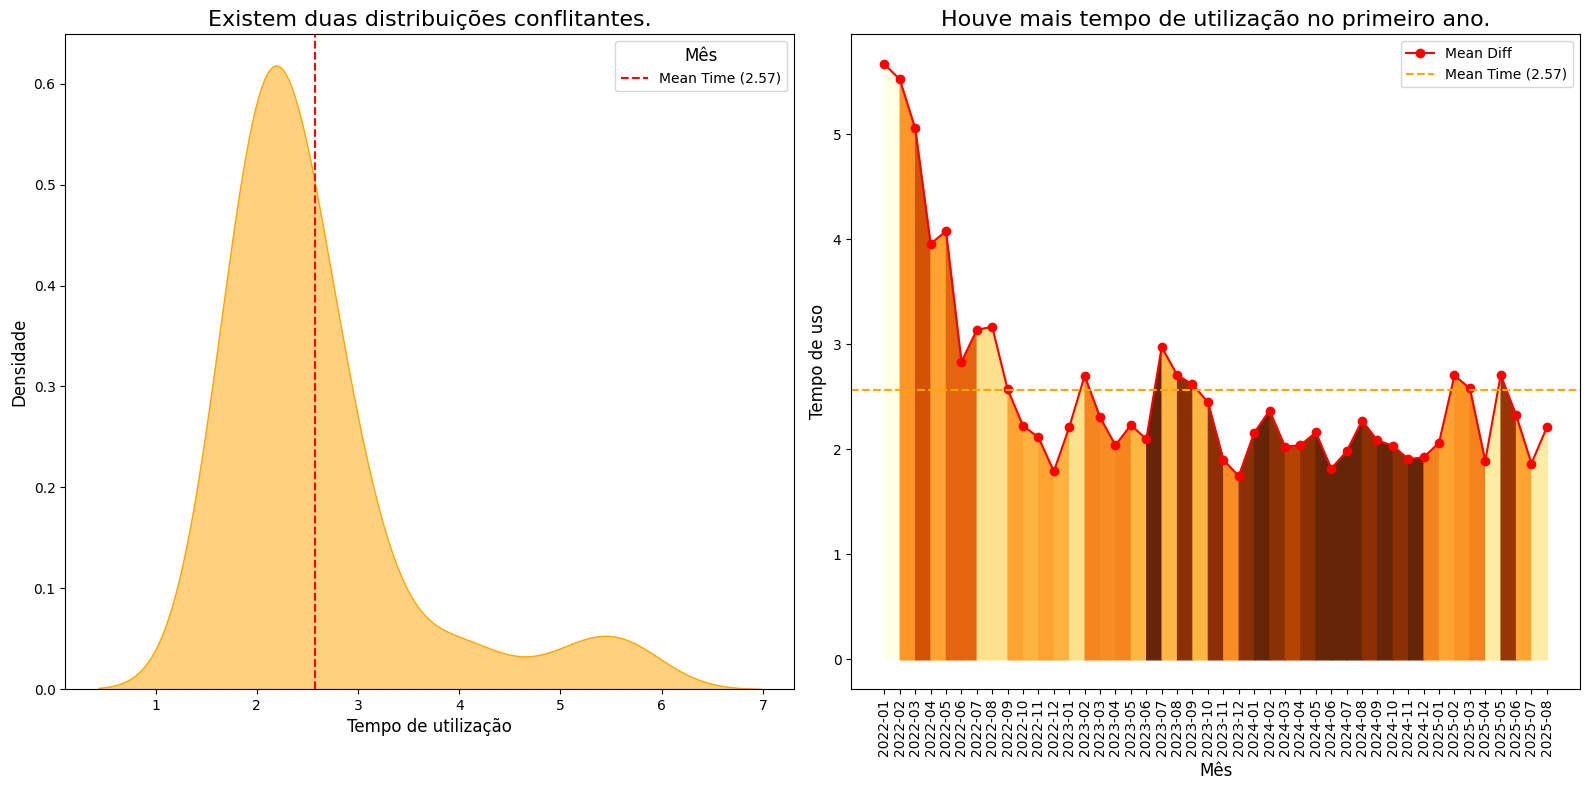

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Criar subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de densidade
sns.kdeplot(data=mean_entries_with_users, x="mean_diff", fill=True, alpha=0.5, ax=ax1, color="orange")
ax1.axvline(mean_time, color='red', linestyle='--', linewidth=1.5, label=f'Mean Time ({mean_time})')
ax1.set_title("Existem duas distribuições conflitantes.", fontsize=16)
ax1.set_xlabel("Tempo de utilização", fontsize=12)
ax1.set_ylabel("Densidade", fontsize=12)
ax1.legend(title="Mês", fontsize=10, title_fontsize=12)

# Gráfico de linha com hachura baseada em n_users
x = mean_entries_with_users['month']
y = mean_entries_with_users['mean_diff']
n_users = mean_entries_with_users['n_users']

# Normalizar os valores de n_users para variar a intensidade da cor
norm = (n_users - n_users.min()) / (n_users.max() - n_users.min())

# Obter a paleta de cores viridis
cmap = plt.cm.YlOrBr

# Plotar a linha
ax2.plot(x, y, marker='o', linestyle='-', color='red', label='Mean Diff')

# Preencher a área abaixo da curva com cores da paleta viridis
for i in range(len(x) - 1):
    ax2.fill_between(
        [x.iloc[i], x.iloc[i + 1]],
        0,
        [y.iloc[i], y.iloc[i + 1]],
        color=cmap(norm.iloc[i])
    )

# Adicionar uma linha horizontal no valor de mean_time
ax2.axhline(mean_time, color='orange', linestyle='--', linewidth=1.5, label=f'Mean Time ({mean_time})')

# Configurar título, rótulos e legenda
ax2.set_title("Houve mais tempo de utilização no primeiro ano.", fontsize=16)
ax2.set_xlabel("Mês", fontsize=12)
ax2.set_ylabel("Tempo de uso", fontsize=12)
ax2.legend(fontsize=10)

# Rotacionar os rótulos do eixo x no segundo gráfico
ax2.tick_params(axis='x', rotation=90)

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()